# Project 5 : Optimisez la gestion des données d'une boutique avec R ou Python
## 3 Missions : 
### 1. Rapprocher un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne. 
### 2. Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.
### 3. Effectuer une analyse sur des erreurs de saisie dans certains prix des produits afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.


## 1. Rapprocher les deux exports du web et d'erp

In [1]:
#Importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importation des Data Frames
web = pd.read_excel('web.xlsx')
erp = pd.read_excel('erp.xlsx')
liaison = pd.read_excel ('liaison.xlsx')

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [4]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
web.tail()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
#Faire les statistiques rapides
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [6]:
#Déterminer les nombres des lignes et des colonnes sont contenues dans le fichier
web.shape

(1513, 28)

In [7]:
#Afficher des types de l'ensemble des colonnes
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [8]:
#Vérifier les valeurs manquantes
web[web['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Afficher les valeurs non manquantes
web = web[~web['sku'].isna()]
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [10]:
#Compter les nombres de produit
web['sku'].value_counts()

bon-cadeau-25-euros    2
14828                  2
14679                  2
15526                  2
16305                  2
                      ..
15145                  2
15801                  2
15452                  2
15038                  2
16230                  2
Name: sku, Length: 714, dtype: int64

In [11]:
#Vérifier des doublons
web.duplicated().sum()

0

In [12]:
#Vérifier des doublons dans la colonne sku
web["sku"].duplicated().sum()

714

In [13]:
#Identifier le type de post
web.post_type.value_counts()

product       714
attachment    714
Name: post_type, dtype: int64

In [14]:
#Compter le nombre de chaque produit
web['sku'].value_counts()

bon-cadeau-25-euros    2
14828                  2
14679                  2
15526                  2
16305                  2
                      ..
15145                  2
15801                  2
15452                  2
15038                  2
16230                  2
Name: sku, Length: 714, dtype: int64

In [15]:
#Compter les nombres des valeurs différentes
web['sku'].nunique()

714

In [16]:
#Remplacer les valeurs manquantes, NaN avec zero
web.fillna(0,inplace=True)

In [17]:
#Afficher les valeurs manquantes
web[web['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [18]:
#Changer le nom de colonne de sku à id_web
web.rename(columns={'sku':'id_web'},inplace=True)

In [19]:
#Afficher le début de data frame 'web'
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [20]:
#Afficher le type de post 'product'
web = web[web['post_type']=='product']
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,0.0,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
767,15891,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
768,15887,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,0.0,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [21]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [22]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
erp.tail()

,product_id,onsale_web,price,stock_quantity,stock_status
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock
824,7338,1,16.3,45,instock


In [23]:
#Faire les statistiques rapides
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [24]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
erp.shape

(825, 5)

In [25]:
#Vérifier des doublons dans la colonne product_id
erp["product_id"].duplicated().sum()

0

In [26]:
#Vérifier des doublons
erp.duplicated().sum()

0

In [27]:
#Afficher les types de l'ensemble des colonnes
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [28]:
#Vérifier les types de données
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [29]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [30]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
liaison.tail()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


In [31]:
#Déterminer les nombres des lignes et des colonnes ensemble
liaison.shape

(825, 2)

In [32]:
#Vérifier des doublons
liaison.duplicated().sum()

0

In [33]:
#Vérifier des doublons dans la colonne product_id
liaison["product_id"].duplicated().sum()

0

In [34]:
#Vérifier des doublons dans la colonne id_web
liaison["id_web"].duplicated().sum()

90

In [35]:
#Faire les statistiques rapides
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [36]:
#Afficher les types des données
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [37]:
#Vérifier les types de l'ensemble des colonnes
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [38]:
#Remplacer les valeurs manquantes, NaN avec zero
liaison.fillna(0,inplace=True)

In [39]:
#Joindre les 3 Data Frames
df4 = erp.merge(liaison,how='left',on='product_id').merge(web,on='id_web',how='inner')
df4.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [40]:
df4.dtypes

product_id                        int64
onsale_web                        int64
price                           float64
stock_quantity                    int64
stock_status                     object
id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]


## 2. Le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

In [41]:
#Sélectionner les colonnes de product_id, price et total sales
df4=df4[["product_id","price","total_sales"]].copy()

In [42]:
#Créer une colonne appelé le chiffre d'affaires, CA en multipliant le prix de chacun produit par la quantité de stock
df4['CA']= df4['price']*df4['total_sales']
df4.head()

,product_id,price,total_sales,CA
0,3847,24.2,6.0,145.2
1,3849,34.3,0.0,0.0
2,3850,20.8,0.0,0.0
3,4032,14.1,3.0,42.3
4,4039,46.0,0.0,0.0


In [43]:
#Calculer le chiffre d'affaires par produit
CA_total = df4["CA"].sum()
print(f"Le chiffre d'affaires totale est de : {CA_total}")

Le chiffre d'affaires totale est de : 70568.6


In [44]:
#Résultat
print(f'Le total chiffre d\'affaires de {round(CA_total)}€ est réalisé en ligne')

Le total chiffre d'affaires de 70569€ est réalisé en ligne


## 3. Des erreurs de saisie dans certains prix des produits. 
### a. Effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes .
### b. De les lister et d’en faire une représentation graphique pour plus de lisibilité.

In [45]:
#Lister les valeurs de prix de tous produits
df4['price'].unique()

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,  19.5 ,
        22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,  14.05,
        22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,  16.4 ,
        13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,  16.3 ,   9.7 ,   6.8 ,
        35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,  29.8 ,  25.7 ,  77.4 ,
        53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,  69.  ,  59.  ,  19.2 ,
        29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,   9.3 ,  11.6 ,  14.3 ,
        10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,   7.8 ,   5.7 ,  13.5 ,
        11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,   9.5 ,  12.1 ,  17.8 ,
        27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,  11.3 ,   6.7 ,  79.8 ,
        48.5 ,  39.8 ,  58.8 ,  26.5 ,  13.4 ,  17.1 ,   8.9 ,  17.2 ,
        16.9 ,  29.9 ,   9.6 ,  11.1 ,  28.  ,   8.6 ,  15.3 ,  14.8 ,
      

In [46]:
#Sélectionner les produits et les prix 
data=df4.loc[:,["product_id","price"]]
data

,product_id,price
0,3847,24.2
1,3849,34.3
2,3850,20.8
3,4032,14.1
4,4039,46.0
...,...,...
709,6930,8.4
710,7023,27.5
711,7025,69.0
712,7247,54.8


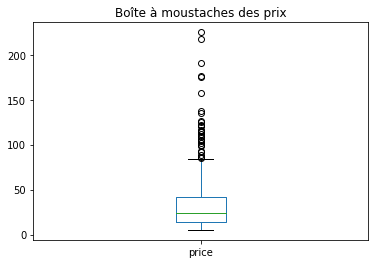

In [47]:
#Détecter des valeurs aberrantes avec Matplotlib
data.boxplot(column =['price'], grid = False);
plt.title('Boîte à moustaches des prix');
plt.show()

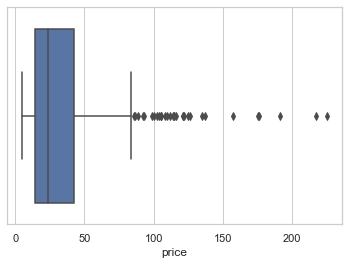

In [48]:
#Détecter des valeurs aberrantes avec Seaborn
sns.set(style="whitegrid")
sns.boxplot(x = 'price',data = data) 
plt.show()

In [49]:
#Faire les statistiques rapides 
data.describe()

,product_id,price
count,714.000000,714.000000
mean,5032.557423,32.493137
std,790.510878,27.810525
min,3847.000000,5.200000
25%,4280.250000,14.100000
50%,4796.000000,23.550000
75%,5710.500000,42.175000
max,7338.000000,225.000000


### Chercher des valeurs aberrantes avec Z score
#### Z score = (Observation - Mean)/ Standard deviation 

In [50]:
#Récupèrer la colonne 'price' sous la forme d'une Series Pandas
price = data['price']
price

0      24.2
1      34.3
2      20.8
3      14.1
4      46.0
       ... 
709     8.4
710    27.5
711    69.0
712    54.8
713    16.3
Name: price, Length: 714, dtype: float64

In [51]:
#Calculer la moyenne de 'price'
price.mean()

32.49313725490197

In [52]:
#Calculer l'écart-type
price.std()

27.810524922323726

In [53]:
#Créer une colonne nommée zscore
data['zscore'] = (data.price - data.price.mean())/data.price.std()
data.head()

,product_id,price,zscore
0,3847,24.2,-0.298201
1,3849,34.3,0.064970
2,3850,20.8,-0.420457
3,4032,14.1,-0.661373
4,4039,46.0,0.485674


In [54]:
#Utiliser les 3 points d'écart-type pour filtrer des outliers, les z scores supérieur à 3
data[data['zscore']>3]

,product_id,price,zscore
199,4352,225.0,6.922087
201,4355,126.5,3.380262
218,4402,176.0,5.160164
221,4406,157.0,4.476969
381,4904,137.0,3.757817
426,5001,217.5,6.652405
511,5612,124.8,3.319134
553,5767,175.0,5.124206
587,5892,191.3,5.710315
603,5917,122.0,3.218453


In [55]:
#Filtrer les z scores inférieur à -3
data[data['zscore']<-3]

,product_id,price,zscore


In [56]:
#Filtrer des outliers
no_outliers=data[(data.zscore<-3)|(data.zscore>3)]
no_outliers.shape[0]

14

In [57]:
#Ecrire une fonction qui va lister les prix considérées comme des outliers
outliers=[]
def detectOutlier(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [58]:
#Observer
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))

Nombre d'outliers détectés => 14


In [59]:
#Résultat
print(priceOutliers)

[225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 135.0, 116.4, 121.0, 121.0]


### Chercher des valeurs aberrantes avec l'interquartile 
### 1,5 fois la distance interquartile avant le premier et après le troisième

In [60]:
#Calculer l'interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 =>" + str(q1))
print("Q3 => " + str(round(q3,2)))
print("IQR => " + str(round(iqr,2)))


Q1 =>14.1
Q3 => 42.18
IQR => 28.08


In [61]:
#Chercher les valeurs limite
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print("Lower_bound => " + str(round(lower_bound,2)))
print("Upper_bound => " + str(round(upper_bound,2)))

Lower_bound => -28.01
Upper_bound => 84.29


In [62]:
#Créer une autre data frame avec les valeurs aberrantes (outliers)
result = data[(data['price'] > upper_bound) | (data['price'] < lower_bound)]
result

,product_id,price,zscore
63,4115,100.0,2.427385
65,4132,88.4,2.010277
199,4352,225.0,6.922087
201,4355,126.5,3.380262
205,4359,85.6,1.909596
218,4402,176.0,5.160164
219,4404,108.5,2.733025
221,4406,157.0,4.476969
222,4407,104.0,2.571216
227,4582,109.6,2.772578


In [63]:
#Lister les outliers
print("Nombre d'outliers détectés => " + str(len(result)))
print(list(result['price']))

Nombre d'outliers détectés => 32
[100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


In [64]:
print(f"Les valeurs aberrantes peuvent être les produits luxe donc il n'y a pas besoin de les supprimer")

Les valeurs aberrantes peuvent être les produits luxe donc il n'y a pas besoin de les supprimer
